In [1]:
import torch
import matplotlib.pyplot as plt
from cornucopia import SynthContrastTransform, SynthFromLabelTransform

Let's generate a synthetic label map. We use circles of varying radii.

/autofs/space/bal_004/users/yb/code/shared_envs/vesselseg/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


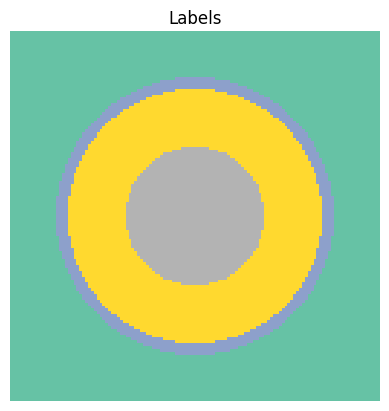

In [2]:
shape = [128, 128]
radius = torch.stack(torch.meshgrid(*[torch.arange(s).float() for s in shape]), -1)
radius -= (torch.as_tensor(shape).float() - 1) / 2
radius = radius.square().sum(-1).sqrt()

lab = torch.zeros_like(radius, dtype=torch.long)
lab[radius < 48] = 1
lab[radius < 44] = 2
lab[radius < 24] = 3

plt.imshow(lab, cmap='Set2', interpolation='nearest')
plt.axis('off')
plt.title('Labels')
plt.show()

Then, instantiate a `SynthTransform` and apply it to our labels.
Note that tensors fed to a `Tranform` layer should have a channel dimension, and no batch dimension.

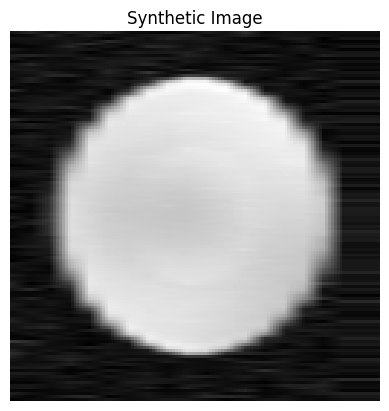

In [3]:
trf = SynthContrastTransform()
img = trf(lab[None])[0]   # needs channel dimension

plt.imshow(img, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Synthetic Image')
plt.show()

Now, let's synthesize a bunch of them

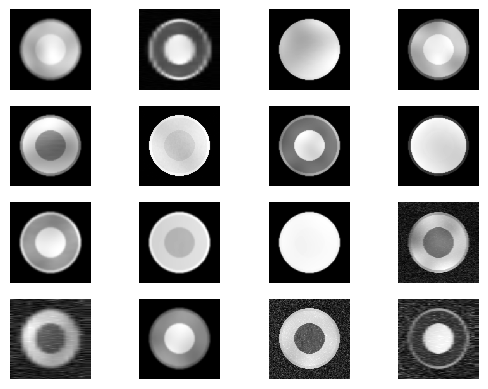

In [4]:
shape = [4, 4]

for i in range(shape[0] * shape[1]):
    plt.subplot(*shape, i+1)
    plt.imshow(trf(lab[None])[0], cmap='gray', interpolation='nearest')
    plt.axis('off')
plt.show()

Finally, let's try the full pipeline with deformations

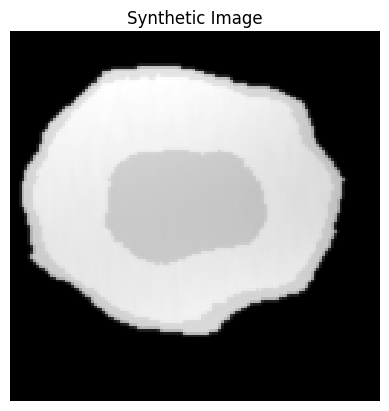

In [5]:
trf = SynthFromLabelTransform()
img, newlab = trf(lab[None])   # needs channel dimension
img, newlab = img[0], newlab[0]

plt.imshow(img, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Synthetic Image')
plt.show()

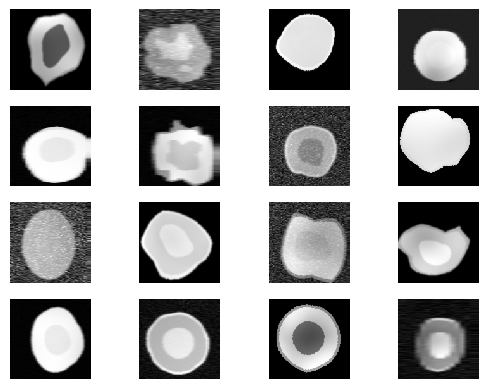

In [7]:
shape = [4, 4]

for i in range(shape[0] * shape[1]):
    plt.subplot(*shape, i+1)
    plt.imshow(trf(lab[None])[0][0], cmap='gray', interpolation='nearest')
    plt.axis('off')
plt.show()